# Introduction to neural network classification with TensorFlow

IIn this notebook we're going to learn how to write neural networks for classification problems.

A classfifcation is where you try to classify something as one thing or another.

A few types of classification problem:
* Binary classification
* Multiclass classification
* Multilabel classification

### Creating data to view and fit



In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now lets visualize it

In [ ]:
import pandas as pd

circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


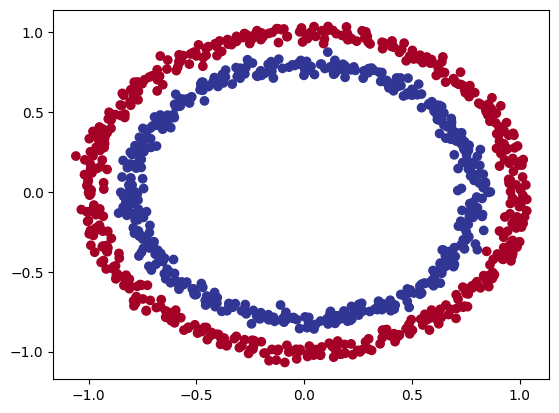

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

### Input and output shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
 # View the firs example of features and labels
 X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate


In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_1.fit(X,y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 5.8555 - accuracy: 0.4910
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 5.0378 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 3.7799 - accuracy: 0.5170
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 1.1286 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.4920


In [ ]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around - 50 % accuracy ... it's performing as

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9093 - accuracy: 0.4660
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6993 - accuracy: 0.4720
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4530
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6942 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5100
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4970
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.4910
Epoch 11/

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932510733604431, 0.5]

In [ ]:
circles['label'].value_counts()

label
1    500
0    500
Name: count, dtype: int64

### Improving our model

1. Create a model - we might to add more layers or increase the number of hidden units within a layer
2. Compilling a model - here we might to choose a different optimizat ion function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7024 - accuracy: 0.5080


[0.7023885250091553, 0.5080000162124634]

In [ ]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.47669157],
       [0.5786183 ],
       [0.5843352 ],
       [0.592954  ],
       [0.41492307],
       [0.59785825],
       [0.5740664 ],
       [0.46922415],
       [0.46624124],
       [0.5980082 ],
       [0.51856935],
       [0.5355518 ],
       [0.5835814 ],
       [0.4360737 ],
       [0.42664748],
       [0.44282886],
       [0.55452216],
       [0.44655108],
       [0.5641113 ],
       [0.5035504 ],
       [0.5020606 ],
       [0.61696124],
       [0.44057274],
       [0.4812166 ],
       [0.61216635],
       [0.5949588 ],
       [0.56578314],
       [0.442891  ],
       [0.43775636],
       [0.43168133],
       [0.46838343],
       [0.60319704],
       [0.57101953],
       [0.44249016],
       [0.4401168 ],
       [0.62070185],
       [0.59629595],
       [0.534492  ],
       [0.43903327],
       [0.5078614 ],
       [0.49821007],
       [0.5572518 ],
       [0.51362455],
       [0.43582004],
       [0.52943933],
       [0.55214906],
       [0.42464486],
       [0.555

To visualize our model's prediction, let's create a function 'plot_decision_boundary()',
this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predicitons across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicitng on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 0].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predicitons on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays togheter

    # Make predicitons
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")

        # We have to reshape our prediction to get them ready for plottting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np. round(y_pred).reshape(xx.shape)


    # Plot the decicsion boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


313/313 [==============================] - 0s 1ms/step
doing binary classification


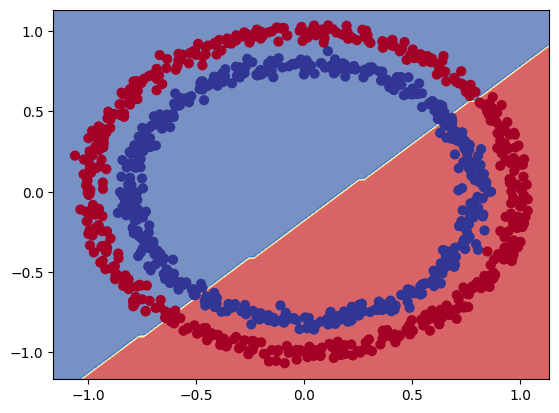

In [ ]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data

## Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100) # <- this will error in TensorFlow 2.7.0+

## After TensorFlow 2.7.0
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_5' (type Sequential).
    
    Input 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_5' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  ## Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  ## After TensorFlow 2.7.0
  tf.keras.layers.Dense(100, input_shape=(None, 1)), # <- define input_shape here
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

model_3.fit(tf.expand_dims(X_reg_train, axis=-1), # <- expand input dimensions
            y_reg_train,
            epochs=100)

2/2 [==============================] - 0s 7ms/step


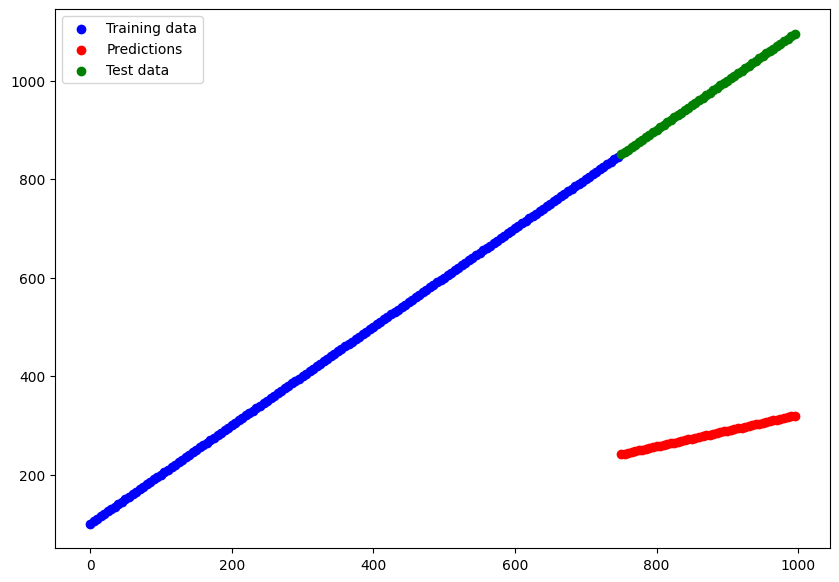

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'X_reg_test' is a 1D NumPy array, we need to reshape it
X_reg_test_reshaped = X_reg_test.reshape(-1, 1)

# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test_reshaped)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.legend()
plt.show()


### THe missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_4.fit(X, y, epochs=100)

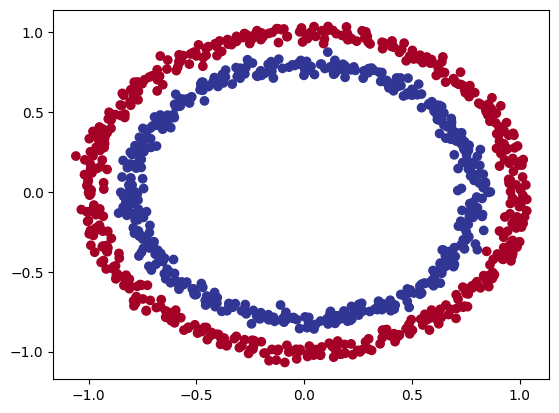

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


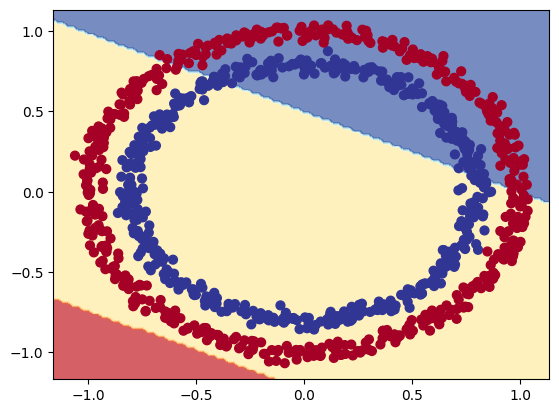

In [ ]:
# Check the decision boundary for our latest model

plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [ ]:
### Let-s try build our first neural network with a non-linear activation function.

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu')
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2923 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0574 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7976 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5339 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.2963 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7973 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8049 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0813 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0409 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0151 - accuracy: 0.5000
Epoch 11/

In [ ]:
# replicate model from tensorflow playground

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu')
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history=model_6.fit(X, y, epochs=100, verbose=0)

model_6.evaluate(X,y)


32/32 [==============================] - 0s 6ms/step - loss: 2.4860 - accuracy: 0.2230


[2.486002206802368, 0.22300000488758087]

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


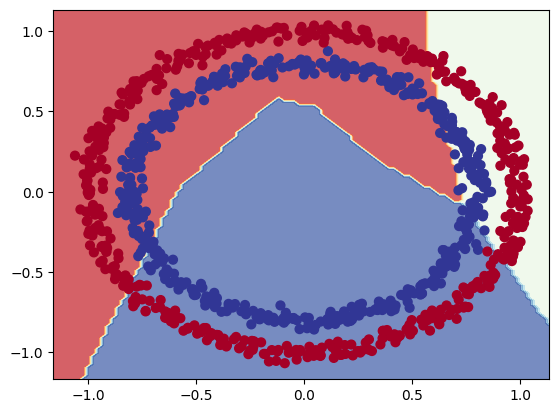

In [ ]:
plot_decision_boundary(model_6, X, y)

In [ ]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history = model_7.fit(X, y, epochs=400, verbose=0)

model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9970


[0.02262279950082302, 0.996999979019165]

313/313 [==============================] - 0s 1ms/step
doing binary classification


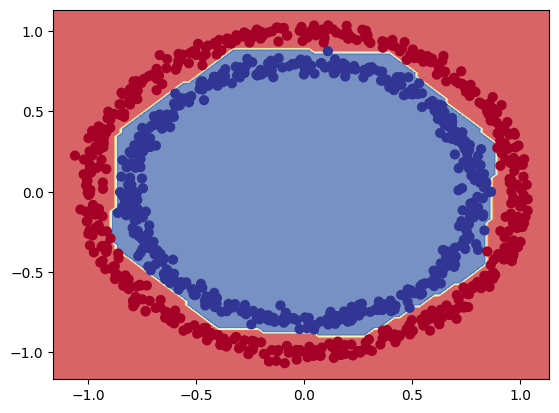

In [ ]:
plot_decision_boundary(model_7, X, y)

**Question:** What's wrong with the predicitons we've made? Are we really evaluating our model correctly? Hint: what data did the model learn on and what data did we predic on?

**Note:** The combination of **linear (straight lines) and non-linear (non_straight lines) functions** is one of the key fundamentals of neural networks

In [ ]:
# Create a toy a tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

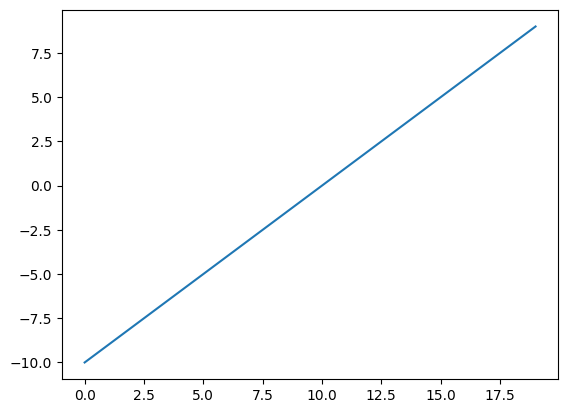

In [ ]:
plt.plot(A);

tf.Tensor(
[4.5397872e-05 1.2339458e-04 3.3535014e-04 9.1105117e-04 2.4726233e-03
 6.6928510e-03 1.7986210e-02 4.7425874e-02 1.1920292e-01 2.6894143e-01
 5.0000000e-01 7.3105860e-01 8.8079703e-01 9.5257413e-01 9.8201376e-01
 9.9330717e-01 9.9752742e-01 9.9908900e-01 9.9966466e-01 9.9987662e-01], shape=(20,), dtype=float32)
tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)


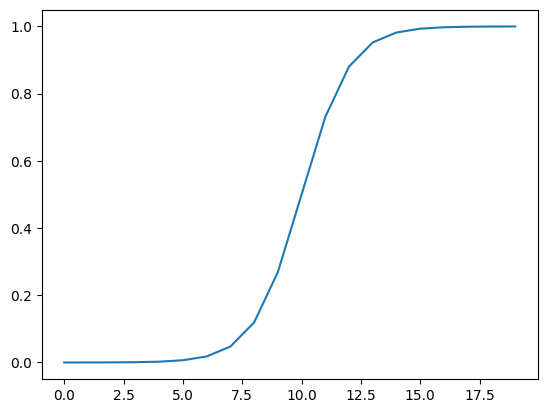

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))  tf.keras.activations.sigmoid
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor

print(sigmoid(A))
print(A)
plt.plot(sigmoid(A))

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(20,), dtype=float32)
tf.Tensor(
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.], shape=(20,), dtype=float32)


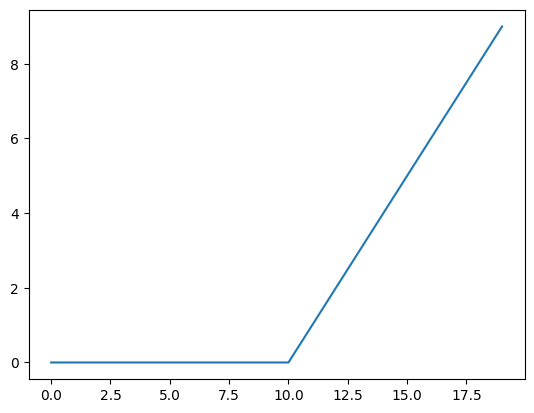

In [ ]:
def relu(x):        # tf.keras.activations.relu
    return tf.maximum(0, x)

print(relu(A))
print(A)
plt.plot(relu(A))

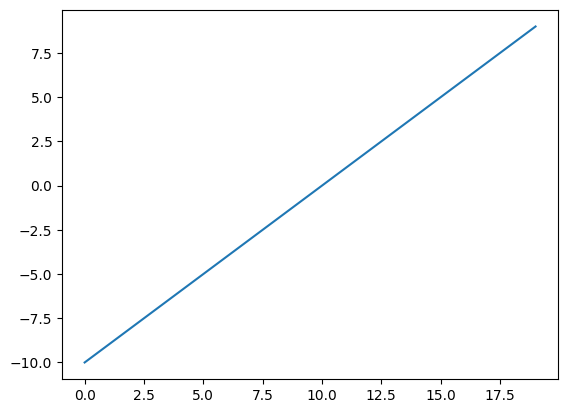

In [ ]:
# Linear activation function  # tf.keras.activations.linear
def linear(A):
    return A

plt.plot(linear(A))

### Evaluating and improving our classification

So far we've been training and testing on the same dataset..

However, in machine learning is basically a sin

So leet's create a training and test set

In [ ]:
# Split into train and test sets

X_train, y_train = X[:800], y[:800 ]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Let's recreate a model to fit on the training data and evaluate on the testing

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])


history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6965 - accuracy: 0.4588
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4850
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4988
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5113
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5325
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5013
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.5362
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5650
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6654 - accuracy: 0.6162
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6493 - accuracy: 0.5962
Epoch 11/25
25/25 [

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1468 - accuracy: 0.9950


[0.1468440592288971, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


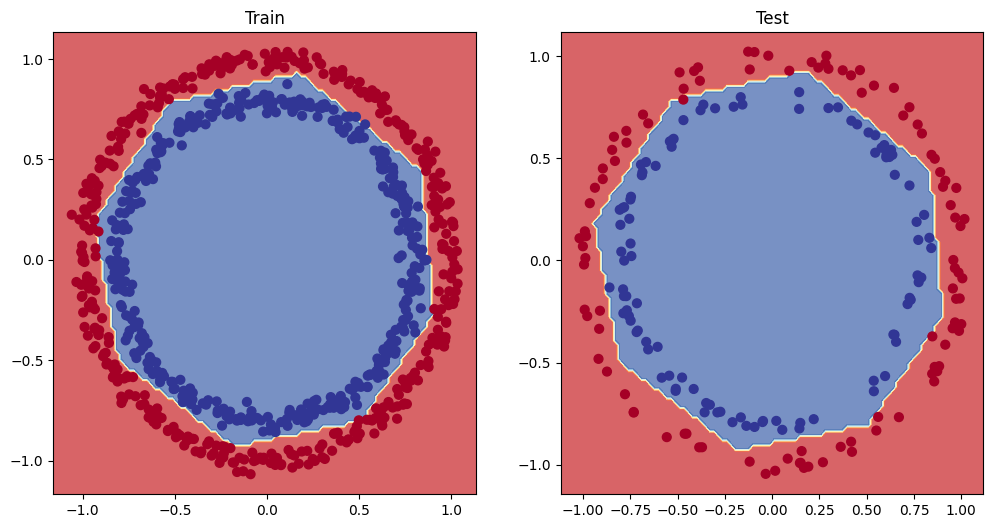

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

### PLOT the loss (or training ) curves

In [ ]:
# convert the history object into a DataFrame

pd.DataFrame(history.history)

,loss,accuracy
0,0.696485,0.45875
1,0.694115,0.48500
2,0.692820,0.49875
3,0.691913,0.51125
4,0.690406,0.53250
5,0.687774,0.50125
6,0.681495,0.53625
7,0.676124,0.56500
8,0.665406,0.61625
9,0.649310,0.59625


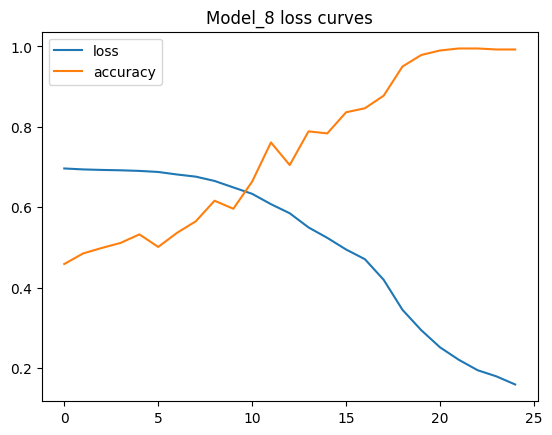

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔐 For many problem, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

to find the ideal reaning rate (the learning rate where the loss decreases the most during trainning) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of funtionality, you can add to your *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here).
* A modified loss curves plot.

In [ ]:

tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_9.compile(loss="binary_crossentropy",
                optimizer='Adam',
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

<Axes: xlabel='epochs'>

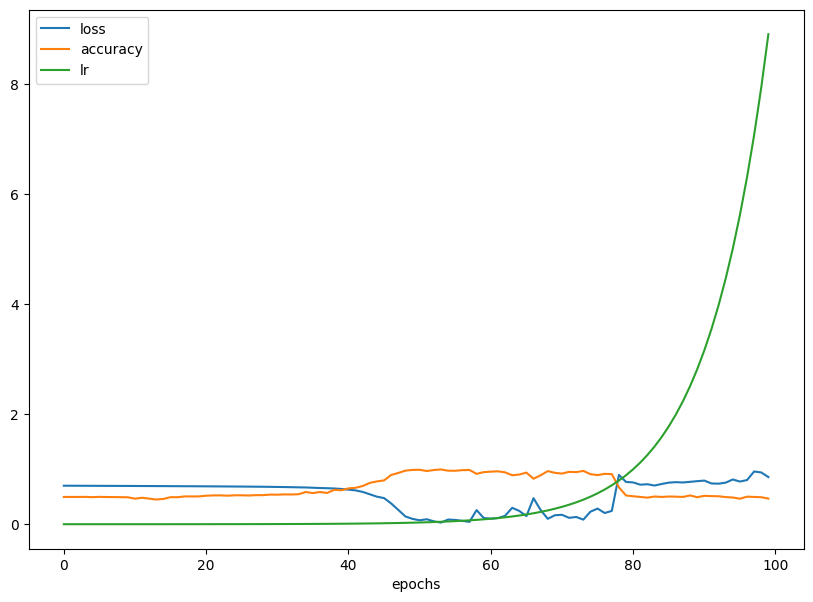

In [ ]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'learning rate vs loss')

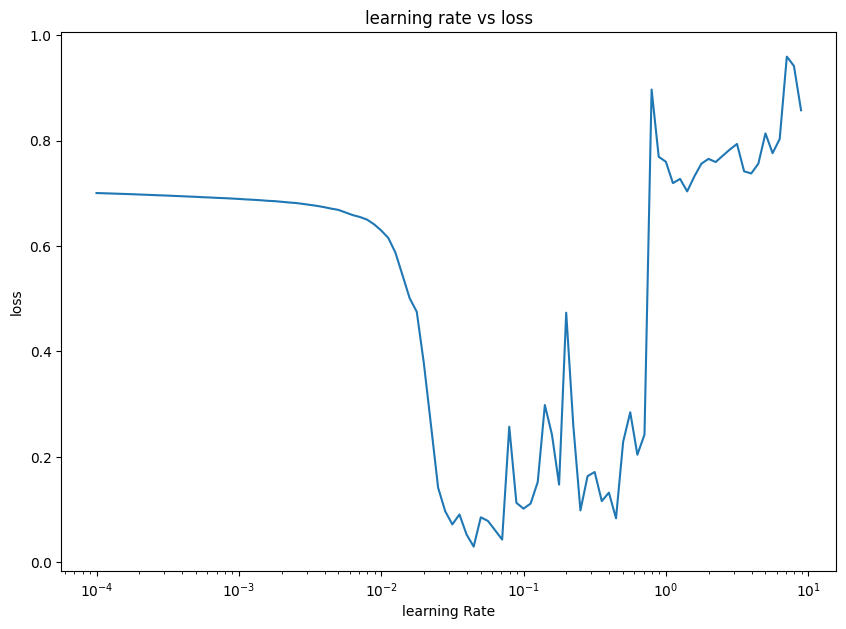

In [ ]:
# Plot the learning rate  versus the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history['loss'])
plt.xlabel('learning Rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:

tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])


history_10 = model_10.fit(X_train, y_train, epochs=20, verbose=0)

In [ ]:
# Evaluate model 10 on the dataset

model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1222 - accuracy: 0.9650


[0.12215305119752884, 0.9649999737739563]

In [ ]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.4950


[0.6933985948562622, 0.4950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


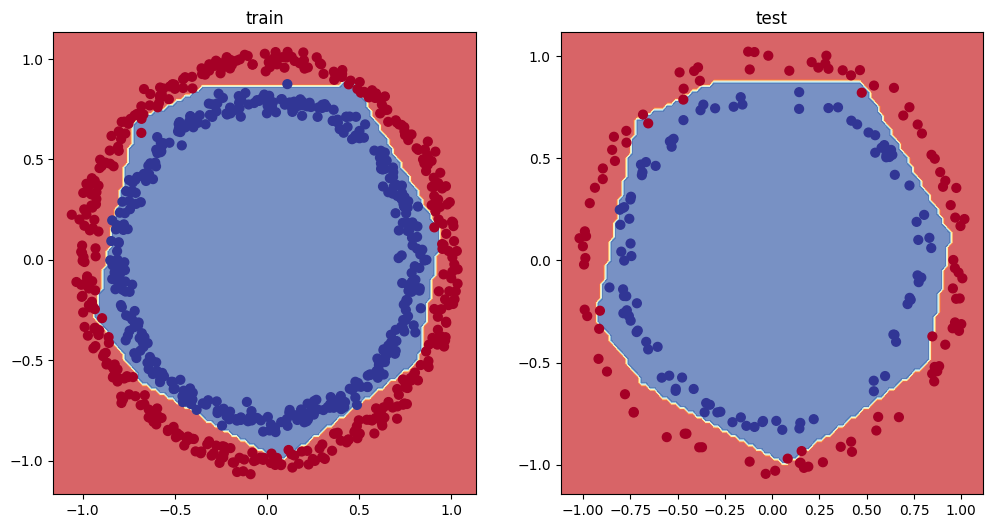

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation methods

Alongside visualizing our models results as much as possible, tehre are a handfull of other classification evaluation methods & metrics you should be faimiliar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confisuion matrix
* Classification report (from sckit-learn)

In [ ]:
# Check the accuarcy of our model

loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 5ms/step - loss: 0.1222 - accuracy: 0.9650
Model loss on the test set: 0.12215305119752884
Model accuracy on the test set: 96.50%
